# Pymaceuticals Inc.
---

### Analysis

- Among the four selected treatments: Capomulin, Ramicane, Infubinol and Ceftamin, Capomulin seems to have the best control of the tumor volume with the minimum IQR.
- However, although Ramicane has slightly wider IQR, it has the lowest Median of the tumor volume.
- Based on the regression model, the slope is 0.95, indicating a strong positive correlation. This suggests that within the Capomulin treatment group, mice with higher average weights tend to have higher average tumor volumes.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(mouse_metadata, study_results,
                        how='outer', on='Mouse ID')

# Display the data table for preview
combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(combine_data['Mouse ID'].unique())

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data[combine_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combine_data[combine_data['Mouse ID']=='g989']
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=combine_data.drop(duplicate_mice.index)
clean_data
# duplicate_mice.index

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_df = combine_data.groupby('Drug Regimen')
summary = drug_df['Tumor Volume (mm3)'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [77]:
#calculate var and sem(standard error of the mean)
summary['Tumor Volume Variance']= drug_df['Tumor Volume (mm3)'].var()
summary['Tumor Volume Std. Err.']= drug_df['Tumor Volume (mm3)'].sem()
#Rename columns
summary = summary.rename(columns = {'mean': 'Mean Tumor Volume', '50%': 'Median Tumor Volume', 
                                    'std': 'Tumor Volume Std. Dev.'})

# Display the summary DataFrame
summary[['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.', 
         'Tumor Volume Std. Err.']]


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [75]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = drug_df['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats.columns =['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.',
                   'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

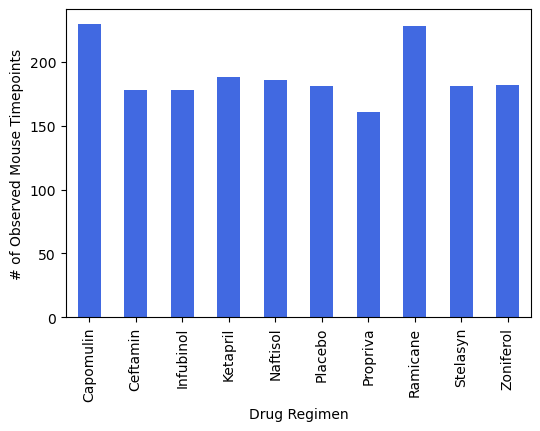

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
num_of_rows = drug_df.size()  #groupby --> Pandas
# Create a bar plot using Pandas
num_of_rows.plot(kind='bar',figsize=(6,4),color='royalblue')
# # num_of_rows = len(drug_df)
# num_of_rows
#Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

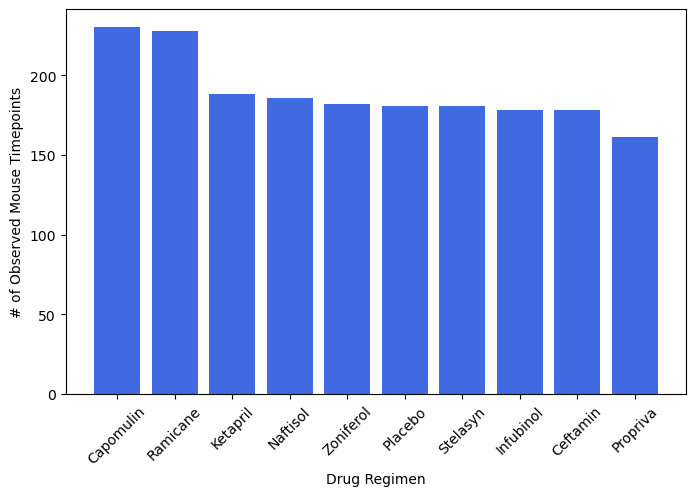

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_row_count=combine_data['Drug Regimen'].value_counts() #value_counts() without Pandas

plt.figure(figsize=(8,5))
plt.bar(drug_row_count.index,drug_row_count.values,color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()


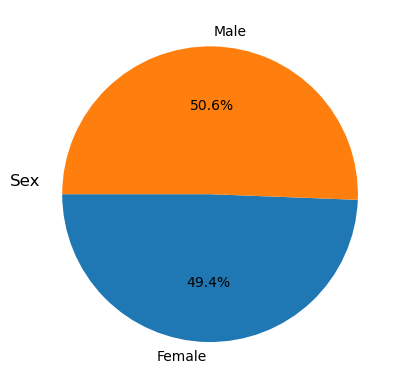

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=combine_data.groupby('Sex')
gender_distribution = gender_data.size()
gender_distribution.plot(kind='pie',autopct='%1.1f%%',startangle=180)
plt.title('Sex',x=0,y=0.5)
plt.show()

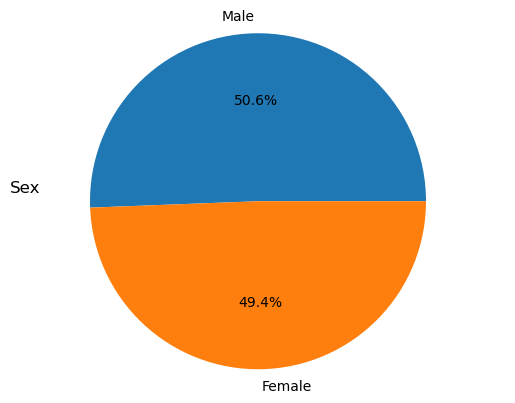

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=combine_data['Sex'].value_counts()
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sex',loc ='left',y=0.5)
plt.show()

## Quartiles, Outliers and Boxplots

In [191]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# drug_df = combine_data.groupby('Drug Regimen')
drug_list=combine_data[combine_data['Drug Regimen'].isin(['Capomulin','Ramicane', 
                                                         'Infubinol', 'Ceftamin'])]
# drug_list
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = drug_list.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
# final_tumor_volume
# pd.DataFrame({'volume':final_tumor_volume})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
full_final_list = final_tumor_volume.merge(combine_data, on=['Mouse ID','Timepoint'],how = 'left')
full_final_list[['Mouse ID','Timepoint','Tumor Volume (mm3)']].set_index('Mouse ID')

,Timepoint,Tumor Volume (mm3)
Mouse ID,,
a203,45,67.973419
a251,45,65.525743
a275,45,62.999356
a411,45,38.407618
a444,45,43.047543
...,...,...
y769,45,68.594745
y793,45,31.896238
y865,45,64.729837


In [206]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=['Capomulin','Ramicane','Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = full_final_list['Tumor Volume (mm3)'].quantile(0.25)
Q3 = full_final_list['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 +1.5*IQR
outliers = full_final_list[(full_final_list['Tumor Volume (mm3)']<lower_bound)|
                            (full_final_list['Tumor Volume (mm3)']>upper_bound)]
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatment:
    subset = full_final_list[full_final_list['Drug Regimen'] == x]
    tumor_volume_data.append(subset['Tumor Volume (mm3)'].tolist())
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    Q1_treatment = subset['Tumor Volume (mm3)'].quantile(0.25)
    Q3_treatment = subset['Tumor Volume (mm3)'].quantile(0.75)
    IQR_treatment = Q3_treatment - Q1_treatment
    lower_bound_treatment = Q1_treatment - 1.5 * IQR_treatment
    upper_bound_treatment = Q3_treatment + 1.5 * IQR_treatment
    outliers_treatment = subset[(subset['Tumor Volume (mm3)'] < lower_bound_treatment) | (subset['Tumor Volume (mm3)'] > upper_bound_treatment)]
    
    if outliers_treatment.empty:
        print(f"{x} Potential outliers: No outliers found")
    else:
        print(f"{treatment} Potential outliers:")
        print(outliers_treatment['Tumor Volume (mm3)'])


Capomulin Potential outliers: No outliers found
Ramicane Potential outliers: No outliers found
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] Potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential outliers: No outliers found


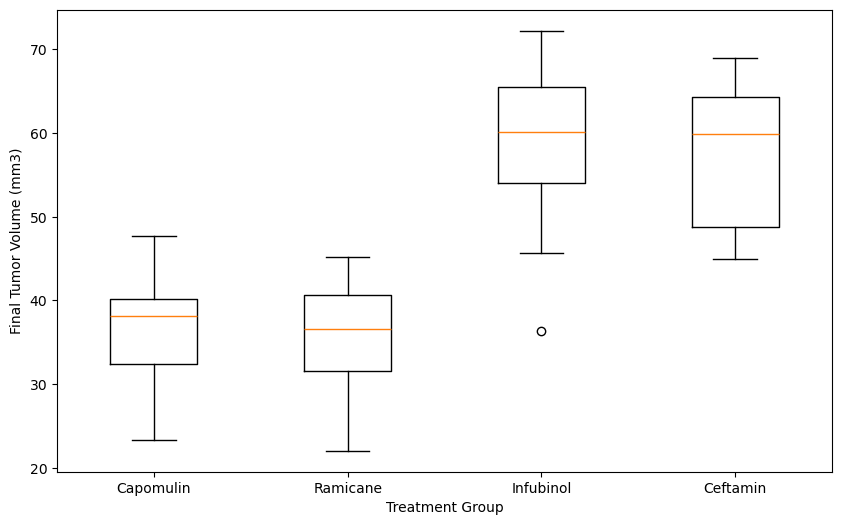

In [228]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol = [full_final_list[full_final_list['Drug Regimen']==x]['Tumor Volume (mm3)'].tolist() for x in treatment]
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol,labels=treatment)
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()
# # Group the data by 'Drug Regimen' and get the tumor volume data for each treatment group
# tumor_volume_data = [full_final_list[full_final_list['Drug Regimen'] == x]['Tumor Volume (mm3)'].tolist() for x in treatment]

# # Create a box plot to visualize the distribution of tumor volume for each treatment group
# plt.figure(figsize=(10, 6))
# plt.boxplot(tumor_volume_data, labels=treatment)
# plt.title('Distribution of Tumor Volume for Each Treatment Group')
# plt.xlabel('Treatment Group')
# plt.ylabel('Tumor Volume (mm3)')
# plt.grid(axis='y')
# plt.show()

## Line and Scatter Plots

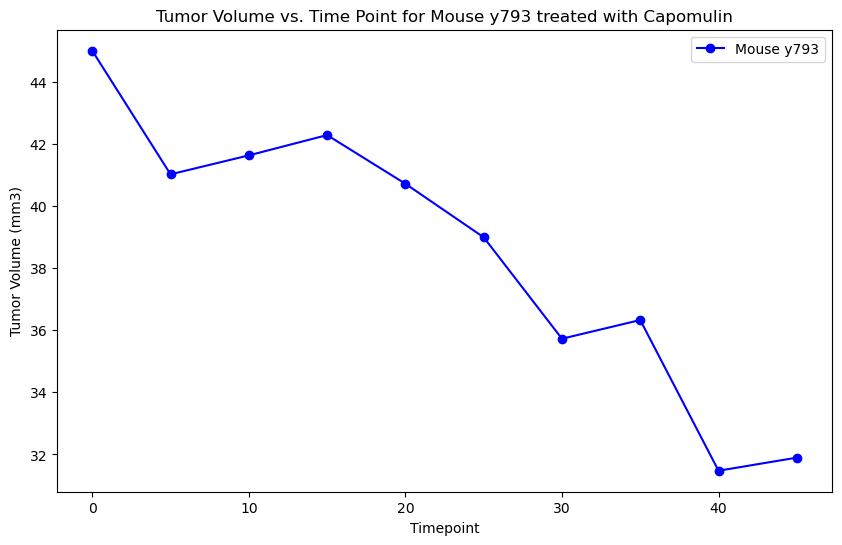

In [245]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a single mouse treated with Capomulin
mouse_id = 'y793'  # Replace 'mouse_id' with the actual mouse ID
capomulin_data = combine_data[(combine_data['Drug Regimen'] == 'Capomulin') & (combine_data['Mouse ID'] == mouse_id)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse {mouse_id}')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.legend()
# plt.xlim(0,50)
# plt.ylim(40,50)
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

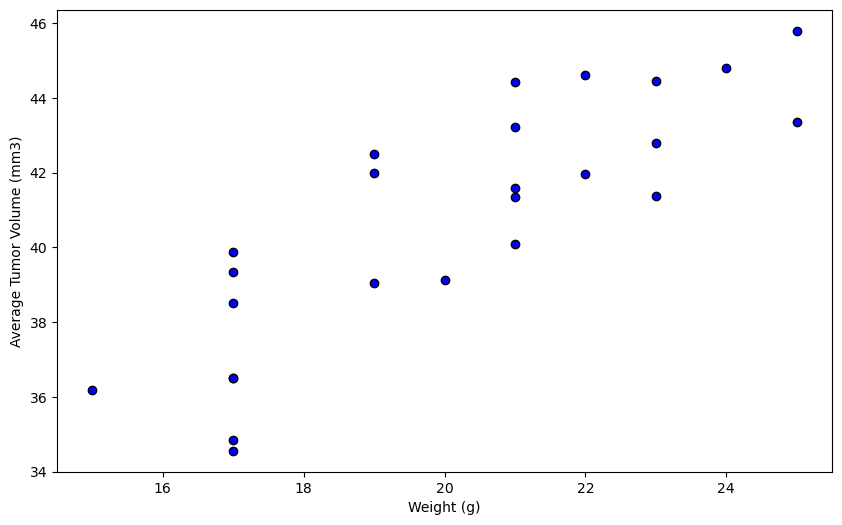

In [257]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
full_capomulin_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = full_capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = full_capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='b',edgecolors='black')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# capomulin_data = combine_data[combine_data['Drug Regimen'] == 'Capomulin']

# # Calculate the average tumor volume for each mouse
# average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# # Get the corresponding mouse weight for each mouse
# mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# # Create the scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# # Add labels and title
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
# plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# # Display the plot
# plt.show()


## Correlation and Regression

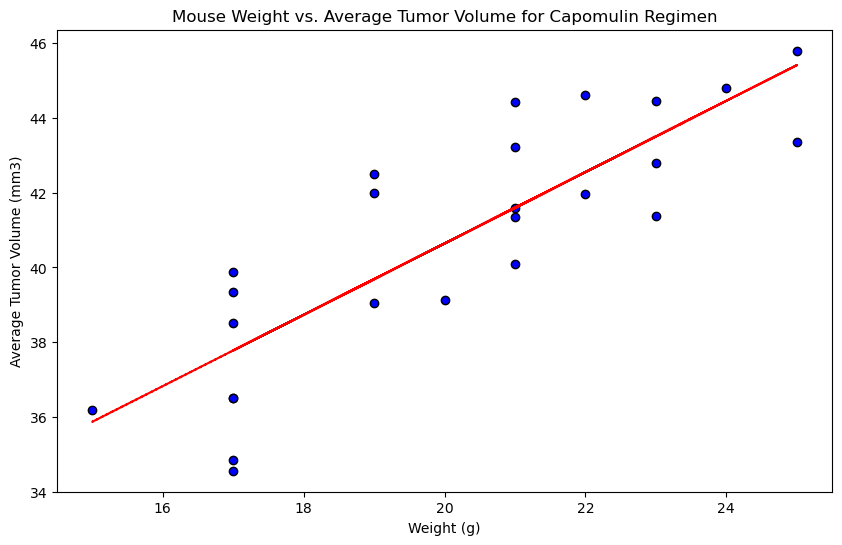

Correlation Coefficient: 0.8419363424694722
Linear Regression: y = 0.9544396890241049x + 21.552160532685008


In [258]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy.stats import linregress
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='blue', edgecolors='black')

# Plot the regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='dashed')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()

# Print the correlation coefficient and regression details
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression: y = {slope}x + {intercept}")
